# Financial Analytics

### Problem Statement

Without analyzing the competition, it is difficult for a business to survive. 
So the task here is to analyze the competition for the management to provide better results.
This data set has information on the market capitalization of the top 500 companies in India.

In [1]:
# import the libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset and print first five rows
df = pd.read_csv("Financial Analytics data.csv")
df.head()

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN


In [3]:
# print dimensions of the dataset
df.shape

(488, 5)

In [4]:
# see data types of the values hold
df.dtypes

S.No.                  int64
Name                  object
Mar Cap - Crore      float64
Sales Qtr - Crore    float64
Unnamed: 4           float64
dtype: object

In [5]:
# check number of missing values present in the dataset
df.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [6]:
# print percentage of missing values in the data
round(df.isnull().sum()/len(df)*100 ,2)

S.No.                 0.00
Name                  0.00
Mar Cap - Crore       1.84
Sales Qtr - Crore    25.20
Unnamed: 4           80.74
dtype: float64

In [7]:
# drop the column unnamed
df.drop(["Unnamed: 4"] , axis = 1, inplace = True)

In [8]:
df.shape

(488, 4)

In [9]:
# drop null values from Mar Cap - Crore column
df.dropna(inplace= True)

In [10]:
df.isnull().sum()

S.No.                0
Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [11]:
df.shape

(365, 4)

In [12]:
# rename the columns
dict = {"S.No.":"Sr.No." , "Name":"Company_Name" , "Mar Cap - Crore":"Mar_Cap_Crore" , "Sales Qtr - Crore":"Sales_Qtr_Crore"}
df.rename(columns = dict , inplace = True)
df.head()

,Sr.No.,Company_Name,Mar_Cap_Crore,Sales_Qtr_Crore
0,1,Reliance Inds.,583436.72,99810.00
1,2,TCS,563709.84,30904.00
2,3,HDFC Bank,482953.59,20581.27
3,4,ITC,320985.27,9772.02
4,5,H D F C,289497.37,16840.51


In [13]:
# set column sr.no. as index for the data
df=df.set_index("Sr.No.")

In [14]:
df.head()

,Company_Name,Mar_Cap_Crore,Sales_Qtr_Crore
Sr.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51


In [15]:
# print detail information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company_Name     365 non-null    object 
 1   Mar_Cap_Crore    365 non-null    float64
 2   Sales_Qtr_Crore  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB


In [16]:
# print statistical measures for the numerical data
df.describe()

,Mar_Cap_Crore,Sales_Qtr_Crore
count,365.000000,365.000000
mean,31300.970301,4395.976849
std,67224.641338,11092.206185
min,3017.070000,47.240000
25%,5089.870000,593.740000
50%,9097.330000,1278.300000
75%,21372.180000,2840.750000
max,583436.720000,110666.930000


## Outlier Detection

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

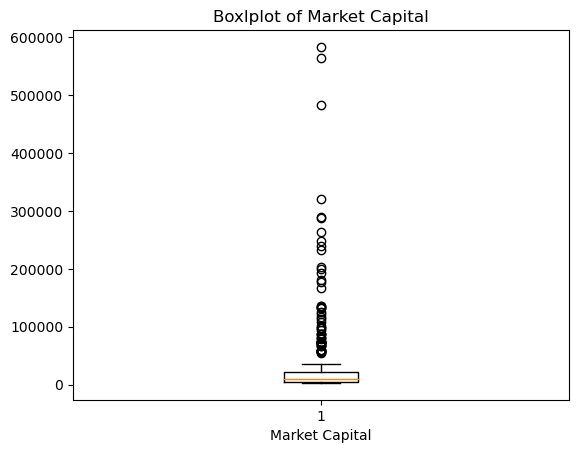

In [18]:
# plot boxplot of market capital column to check for outliers
plt.boxplot(df["Mar_Cap_Crore"])
plt.xlabel("Market Capital")
plt.title("Boxlplot of Market Capital")
plt.show()

According to boxplot there are outliers present in the market capital of companies.

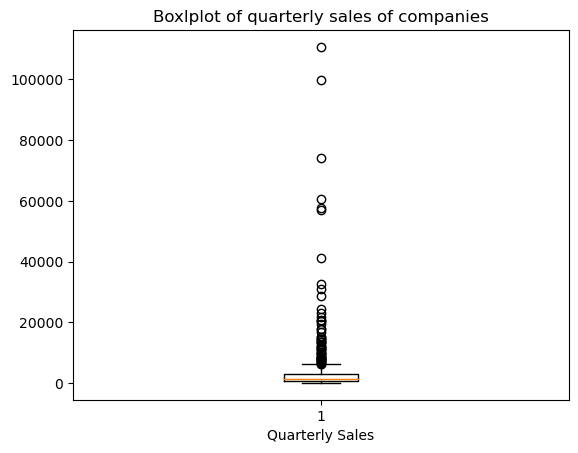

In [19]:
# plot boxplot of market capital column to check for outliers
plt.boxplot(df["Sales_Qtr_Crore"])
plt.xlabel("Quarterly Sales")
plt.title("Boxlplot of quarterly sales of companies")
plt.show()

Also in the column of Quarterly sales for companies outliers are observed.

To build the accurate comparison model we need to drop the outliers or handle it But as we are working on Financial data it is not advisable to drop the outliers.

In [20]:
# print mean of market capital
mean = round(df["Mar_Cap_Crore"].mean(),2)
print("Mean of Mar_Cap_Crore is", mean)

Mean of Mar_Cap_Crore is 31300.97


In [21]:
# print mean of market capital
mean = round(df["Sales_Qtr_Crore"].mean(),2)
print("Mean of Sales_Qtr_Crore is", mean)

Mean of Sales_Qtr_Crore is 4395.98


In [22]:
# print top 10 companies with highest market capitalization
top_companies_Mar_Cap = df.nlargest(10 , "Mar_Cap_Crore" , keep = 'all')
top_companies_Mar_Cap

,Company_Name,Mar_Cap_Crore,Sales_Qtr_Crore
Sr.No.,,,
1,Reliance Inds.,583436.72,99810.00
2,TCS,563709.84,30904.00
3,HDFC Bank,482953.59,20581.27
4,ITC,320985.27,9772.02
5,H D F C,289497.37,16840.51
6,Hind. Unilever,288265.26,8590.00
7,Maruti Suzuki,263493.81,19283.20
8,Infosys,248320.35,17794.00
9,O N G C,239981.50,22995.88


In [23]:
# print top 10 companies with highest Quarterly Sales
top_companies_Qtr_Sales = df.nlargest(10 , "Sales_Qtr_Crore" , keep = 'all')
top_companies_Qtr_Sales

,Company_Name,Mar_Cap_Crore,Sales_Qtr_Crore
Sr.No.,,,
15,I O C L,178017.48,110666.93
1,Reliance Inds.,583436.72,99810.00
24,Tata Motors,117071.87,74156.07
28,B P C L,98278.00,60616.36
55,H P C L,58034.78,57474.25
10,St Bk of India,232763.33,57014.08
123,Rajesh Exports,23495.54,41304.84
41,Tata Steel,73376.14,32464.14
2,TCS,563709.84,30904.00


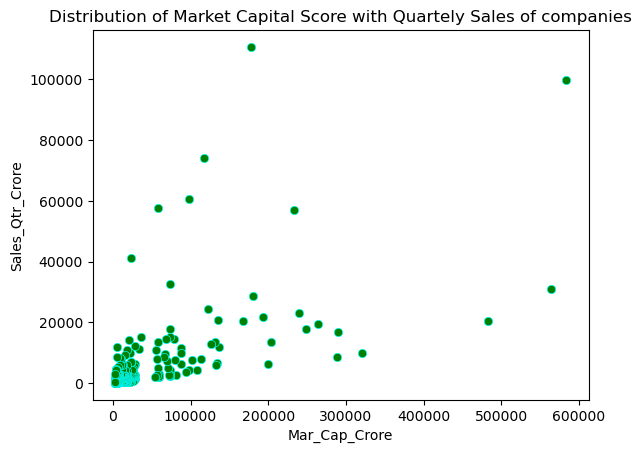

In [24]:
# plot scatter plot of Mar_Cap_Crore Vs Sales_Qtr_Crore

sns.scatterplot(x = "Mar_Cap_Crore" , y = "Sales_Qtr_Crore" ,color = "green",edgecolor = "cyan" , data = df)
plt.title("Distribution of Market Capital Score with Quartely Sales of companies")
plt.show()

In [25]:
import warnings
warnings.filterwarnings("ignore")

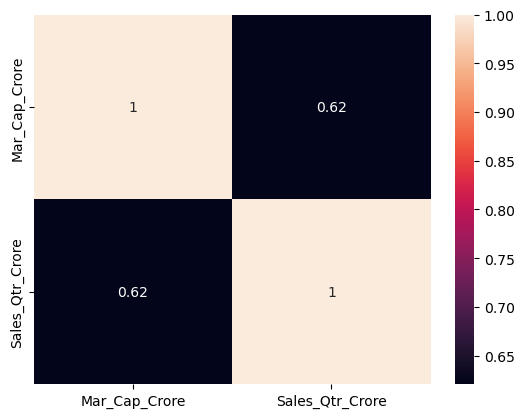

In [26]:
# plot the heatmat to see correlation between the variables
correlation = df.corr()
sns.heatmap(correlation , annot = True)
plt.show()

Market Capital and quartely sales of companies are positively correlated.

Analysis Done:
   1. Data understanding and preprocessing
   2. Data Cleaning (handling missing values)
   3. Outliers detection
   4. Identification of trends and patterns in data
   5. Data visualization

Findings and Conclusion:
    
   1. In this project, we analyzed a dataset of approximately 500 records from leading companies in the market finance sector. The analysis identified the top 10 companies with the highest market capitalization and quarterly sales. 
   
   
   2. According to the data, Reliance Industries holds the highest market capitalization, followed by Tata Consultancy Services and HDFC Bank. In terms of quarterly sales, Indian Oil Corporation leads, with Reliance Industries and Tata Motors also ranking highly.
   
   
   3. We found a strong relationship and positive correlation between market capitalization and quarterly sales. The linearity observed between these variables indicates that market capitalization directly influences quarterly sales.
   
   
   3. In conclusion, companies with greater market capitalization are leading the competition, positioning themselves as significant competitors in the market. 
   
   
   4. The data shows that key competitors include service-based companies like Reliance Industries and Indian Oil Corporation, along with other major players such as Tata Motors, Tata Consultancy Services, and HDFC Bank.